In [83]:
import pandas as pd
import matplotlib.pyplot as plt
dF_stores=pd.read_csv('stores.csv')
dF_products=pd.read_csv('products.csv')
dF_customers=pd.read_csv('customers.csv')
dF_tickets=pd.read_csv('tickets.csv')

In [84]:
dF_day=dF_tickets.groupby(['customerid','datekey'])['extendedamount'].sum()

# descomentando .fillna(0) se obtiene el gasto promedio diario, si no, se obtiene el gasto promedio por compra realizada
dF_JR=dF_day.reset_index().pivot(index="customerid", columns="datekey", values="extendedamount")#.fillna(0)

dF_JR["avg_compra_diaria"]=dF_JR.mean(axis=1)
dF_JR.head()

datekey,2019-01-03,2019-01-04,2019-01-05,2019-01-10,2019-01-11,2019-01-12,2019-01-14,2019-01-19,2019-01-24,2019-01-31,...,2019-03-08,2019-03-11,2019-03-14,2019-03-16,2019-03-18,2019-03-21,2019-03-23,2019-03-25,2019-03-30,avg_compra_diaria
customerid,,,,,,,,,,,,,,,,,,,,,
77000000050003334,NaN,NaN,NaN,NaN,33.14,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.653333
77000000050010221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.300000
77000000050012258,NaN,NaN,NaN,39.24,NaN,NaN,38.13,NaN,18.15,5.06,...,NaN,NaN,3.99,NaN,NaN,34.22,NaN,NaN,NaN,23.131667
77000000050014586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.37,NaN,...,NaN,NaN,5.90,NaN,15.19,NaN,NaN,NaN,NaN,11.958000
77000000050014974,11.2,27.91,NaN,NaN,22.22,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.418000


In [85]:
data=pd.DataFrame()
data['avg_compra_diaria'] = dF_JR['avg_compra_diaria']
data_Final = data.merge(dF_customers, on="customerid", how = 'inner')
data_Final.head(20)

,customerid,avg_compra_diaria,isocountrycode,regularstoreid,registrationdate,unregistrationdate,gender,age,zipcode
0,77000000050003334,49.653333,ES,ES4507,2017-11-26,NaN,NaN,NaN,NaN
1,77000000050010221,33.300000,ES,ES0428,2017-11-26,NaN,NaN,NaN,NaN
2,77000000050012258,23.131667,ES,ES4504,2017-11-26,NaN,NaN,NaN,NaN
3,77000000050014586,11.958000,ES,ES0263,2017-11-26,NaN,NaN,NaN,NaN
4,77000000050014974,19.418000,ES,ES4503,2017-11-26,NaN,NaN,NaN,NaN
5,77000000050015653,26.810000,ES,ES0428,2017-11-26,NaN,F,40.0,50010
6,77000000050019145,7.810000,ES,ES0428,2017-11-27,NaN,F,32.0,50011
7,77000000050027196,40.636667,ES,ES4503,2017-11-27,NaN,NaN,NaN,NaN
8,77000000050028748,23.296667,ES,ES4507,2017-11-27,NaN,NaN,NaN,NaN
9,77000000050034471,16.642500,ES,ES0428,2017-11-27,NaN,NaN,NaN,NaN


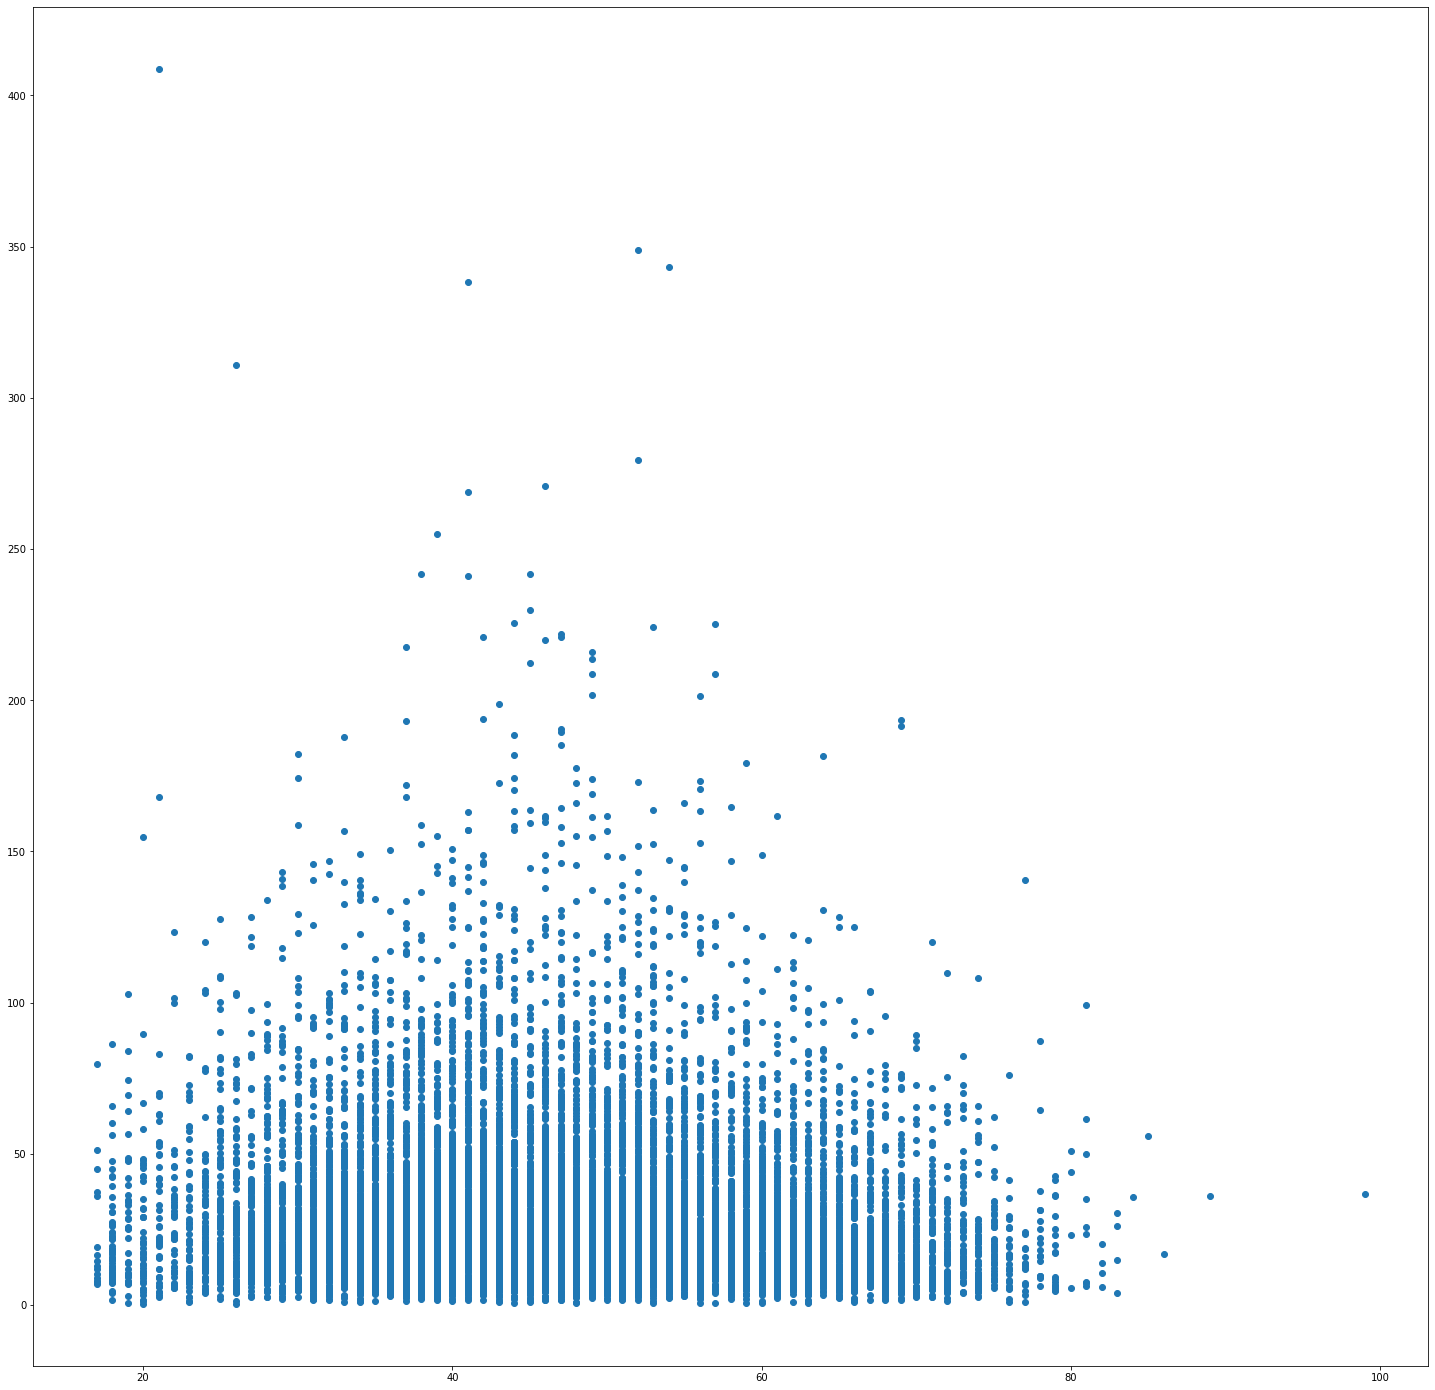

In [86]:
data_Final.loc[(data_Final.age < 15.0) | (data_Final.age > 100.0), 'age'] = 'NaN'
plt.rcParams['figure.figsize'] =[25, 25]
dataplotty = data_Final[['avg_compra_diaria', 'age']].copy()
dataplotty['avg_compra_diaria'] = dataplotty['avg_compra_diaria']
dataplotty['age'] = dataplotty['age']
plt.scatter(dataplotty.values[:, 1], dataplotty.values[:, 0], cmap='rainbow')